In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [3]:
attendance = pd.read_csv('./Data Files/Clean Attendance Payroll and Year.csv')
population = pd.read_csv('./Data Files/2010 CSA Population by Team.csv')

In [4]:
attendance = attendance.groupby('Tm')
attendance = attendance.mean()
attendance = attendance[['Attend/G']]

In [5]:
population.columns = ['Tm','pop']

In [6]:
combined = population.merge(attendance, on = 'Tm')

In [7]:
attendance = []
population = []

attendance.append(combined['Attend/G'])
population.append(combined['pop'])

population = population[0]
attendance = pd.to_numeric(attendance[0])

In [8]:
print(population.head())
print(attendance.head())

correlation = attendance.corr(population)
correlation

0    5584216
1    5119510
2    5480873
3    9686021
4    9686021
Name: pop, dtype: int64
0    29664.181818
1    25986.090909
2    36791.545455
3    37367.454545
4    26351.272727
Name: Attend/G, dtype: float64


0.5737651838524113

Text(108.0, 0.5, 'Population (10s of Millions)')

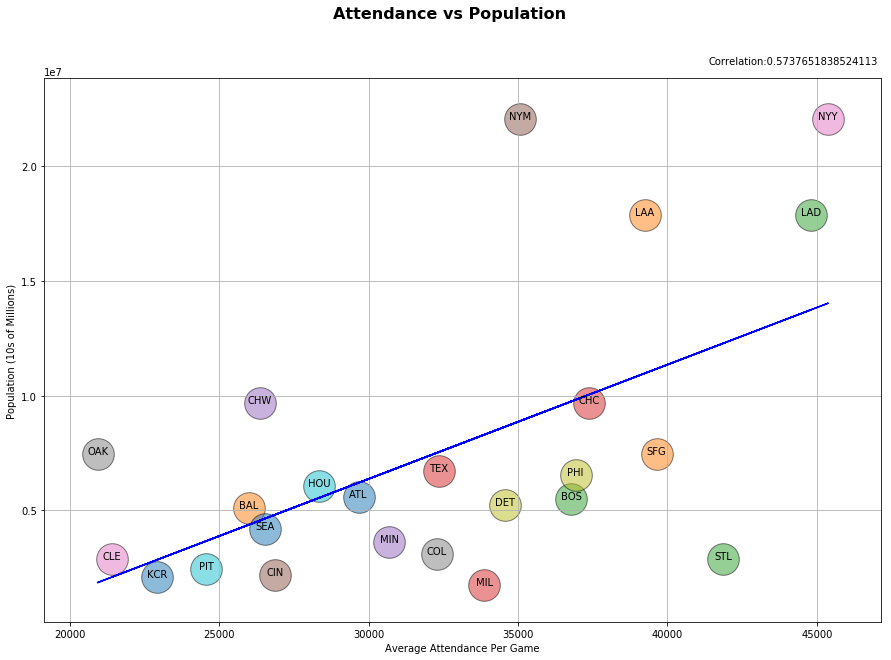

In [25]:
# Plot data
x = [x for x in attendance]
y = [y for y in population]
teams = [team for team in combined['Tm']]

grouped = pd.DataFrame(dict(x=x,y=y,teams=teams))

fig, ax = plt.subplots(facecolor ='w', figsize=(15,10))

for key, row in grouped.iterrows():
    ax.scatter(row['x'], row['y'],alpha = 0.5, s=1000, edgecolors = 'black')
    ax.annotate(row['teams'],ha='center',xy = (row['x'], row['y']))

(slope, intercept, _, _, _) = linregress(attendance, population)
fit = slope * attendance + intercept
ax.plot(attendance, fit, 'b')

plt.figtext(.74,.9,(f"Correlation:{correlation}"))
plt.savefig('./Images/Attendance vs Population')
plt.grid(True)
fig.suptitle("Attendance vs Population", fontsize=16, fontweight="bold")
ax.set_xlabel('Average Attendance Per Game')
ax.set_ylabel('Population (10s of Millions)')